In [1]:
%load_ext autoreload
%autoreload 2

In [73]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown, Latex, Image

from sklearn.model_selection import train_test_split

import markdown2
import tabulate

import pandas_explore as exp
# import pandas_plot as plot

In [18]:
# Titanic data
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic = (df_titanic
 .astype({'Survived':'object', 'Pclass':'object'})
)
df_titanic_train, df_titanic_test = train_test_split(df_titanic, test_size=0.2)
df_titanic_test = df_titanic_test.drop(columns=['Survived'])

In [86]:
# Diamonds data
df_diamonds = pd.read_csv('./data/diamonds.csv')
df_dia_train, df_dia_test = train_test_split(df_diamonds, test_size=0.2)

In [164]:
exp.render_cols_table(
    exp.render_dict_table(exp.dataset_stat(df_titanic_train), f'#### 1) Train statistics', render=False), 
    exp.render_dict_table(exp.variable_types(df_titanic_train), f'#### variable types', render=False),
    exp.render_dict_table(exp.dataset_stat(df_titanic_test), f'#### 2) Test statistics', render=False),
    exp.render_dict_table(exp.variable_types(df_titanic_test), f'#### variable types', render=False), 
    render=True, title=f"# 1. Titanic Datasets")

# 1. Titanic Datasets

Number of variables,12
Number of observations,712
Missing cells,691
Missing cells (%),8.087
Duplicated rows,0
Duplicated rows (%),0.0
Numeric,5
Object,7
Category,0
Datetime,0
Timedeltas,0


# 2. Titanic Variables

## 2.1 Survived

### 1) train set


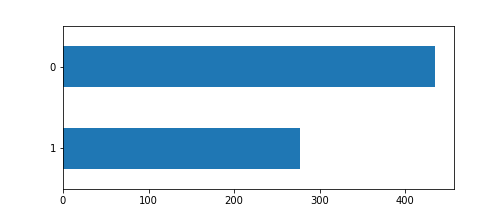
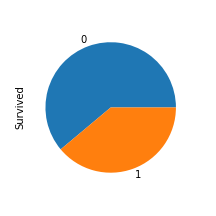

Test set has not column "Survived".

----------

## 2.2 Pclass

### 1) train set


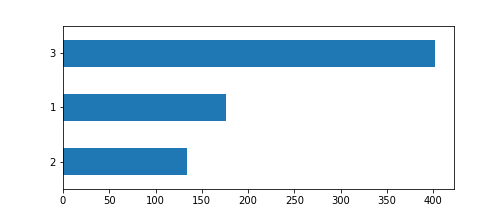
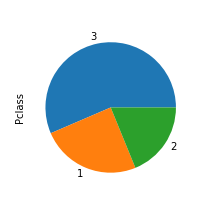

### 2) test set


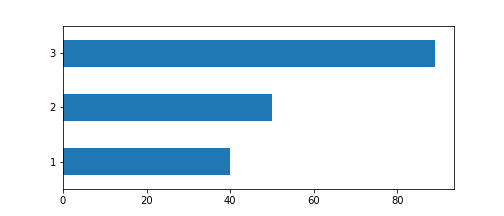
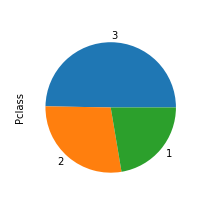

----------

## 2.3 Sex

### 1) train set


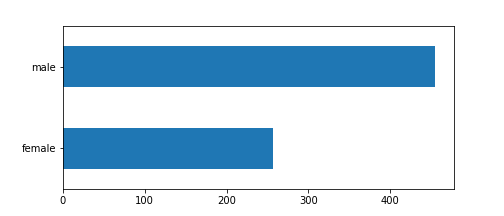
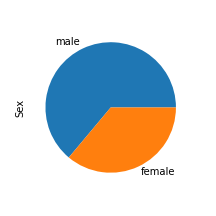

### 2) test set


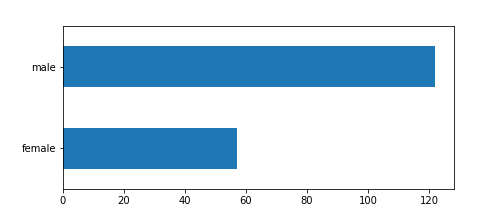
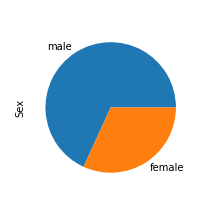

----------

## 2.4 Age

### 1) train set


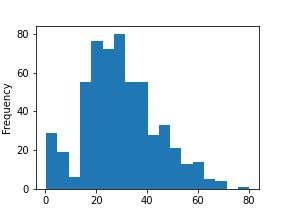

### 2) test set


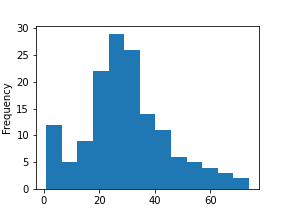

----------

## 2.5 SibSp

### 1) train set


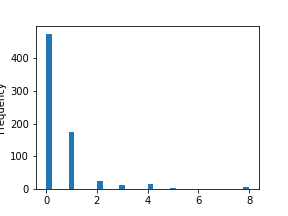

### 2) test set


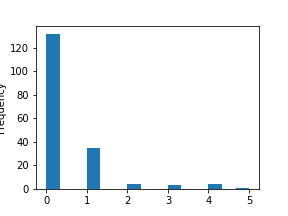

----------

## 2.6 Parch

### 1) train set


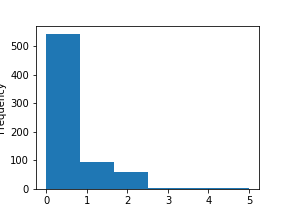

### 2) test set


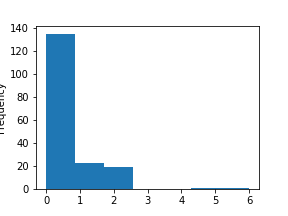

----------

## 2.7 Ticket

### 1) train set


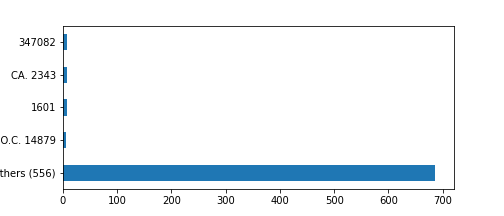
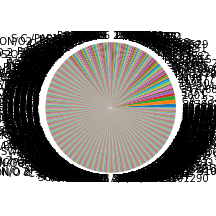

### 2) test set


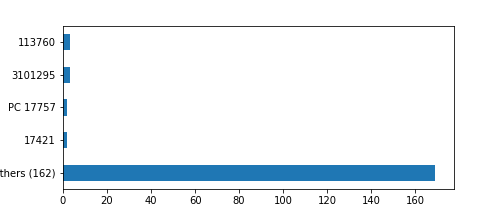
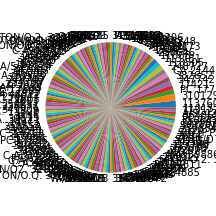

----------

## 2.8 Fare

### 1) train set


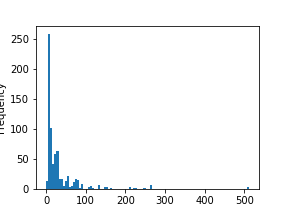

### 2) test set


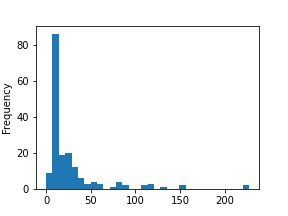

----------

## 2.9 Cabin

### 1) train set


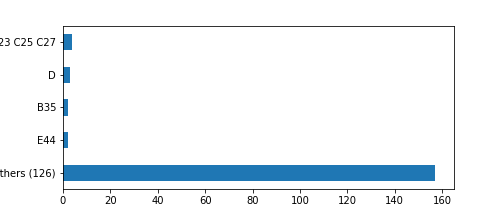
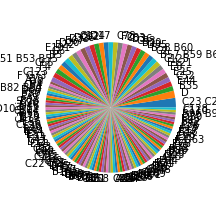

### 2) test set


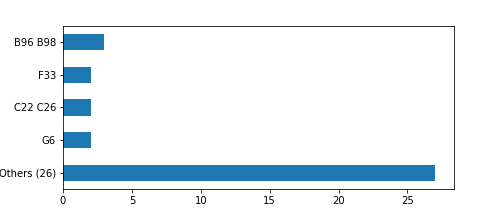
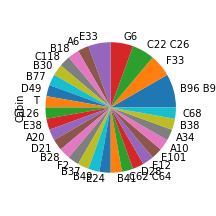

----------

## 2.10 Embarked

### 1) train set


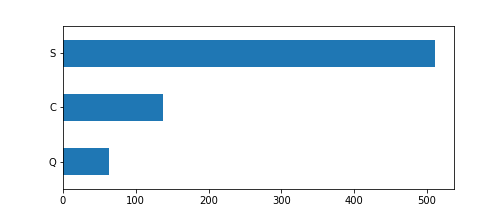
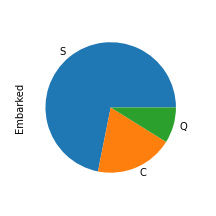

### 2) test set


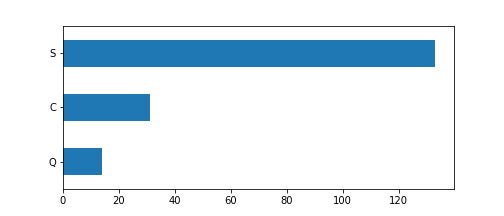
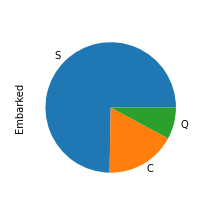

----------

In [173]:
# Train/Test 분포를 비교해보는 랜더링 테스트
display(Markdown(f'# 2. Titanic Variables'))
for idx, col in enumerate(df_titanic_train.drop(columns=['PassengerId', 'Name']).columns.values):
    display(Markdown(f'## 2.{idx+1} {col}'))
    display(Markdown(f'### 1) train set'))
    exp.render_variable(df_titanic_train, col)
    if col in df_titanic_test.columns:
        display(Markdown(f'### 2) test set'))
        exp.render_variable(df_titanic_test, col)
    else:
        display(Markdown(f'Test set has not column "{col}".'))
    display(Markdown(f'----------'))

# 3. Target Distribution

# A. Binary Class Classification 


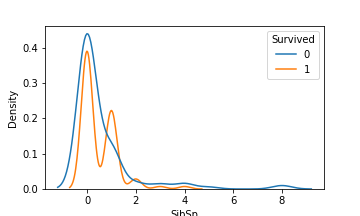
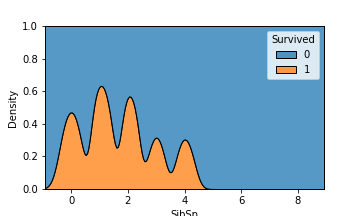


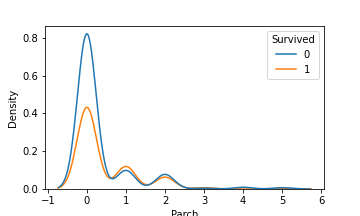
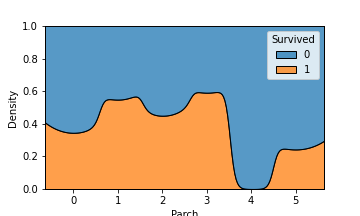


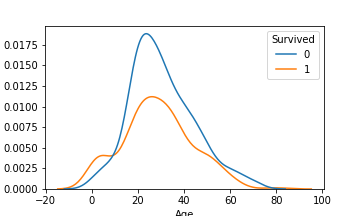
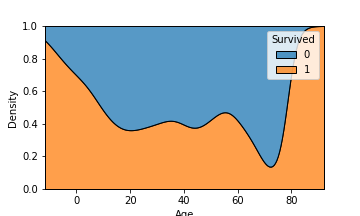


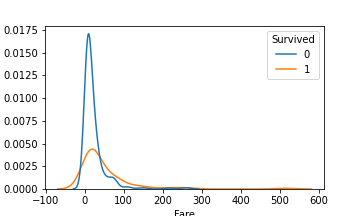
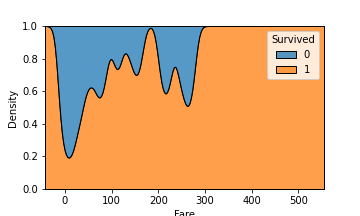


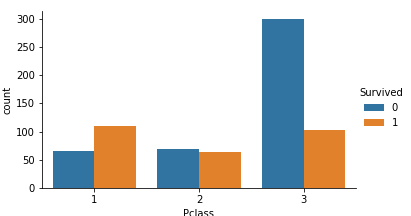
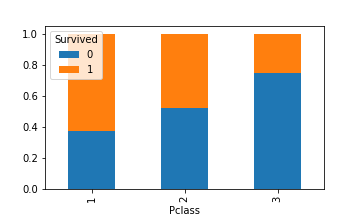


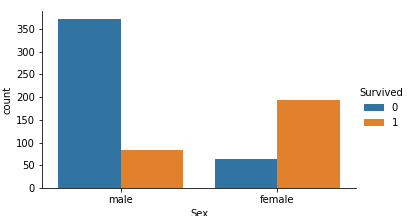
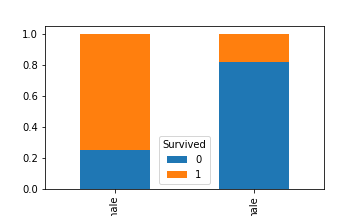


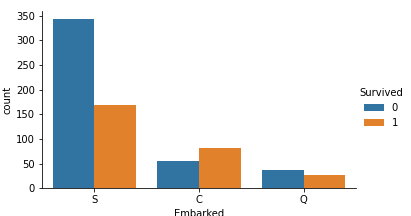
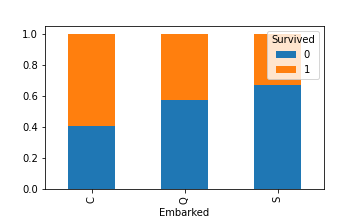

In [188]:
exp.render_target_by_feature_clf(df_titanic_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin']), 'Survived')

# B. Regression


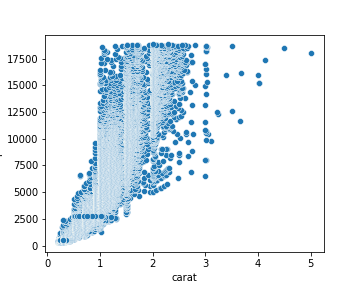
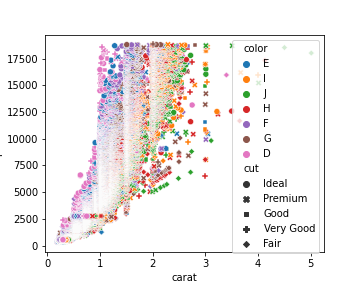
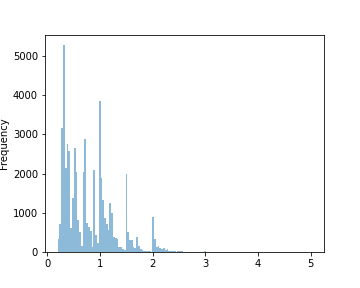


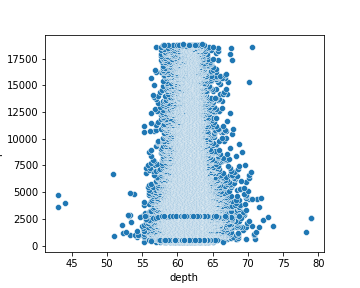
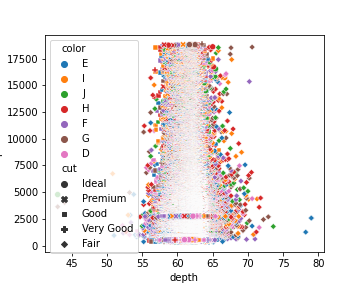
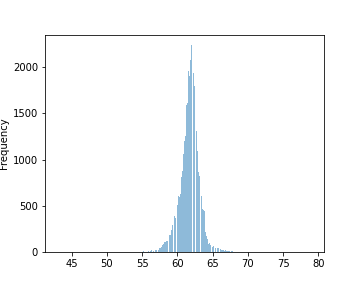


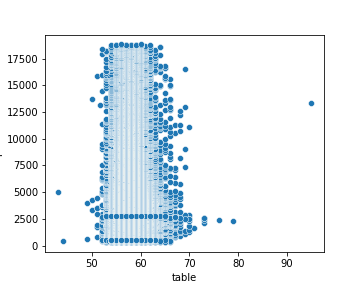
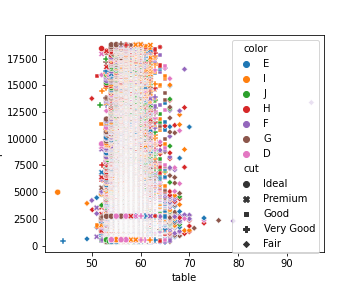
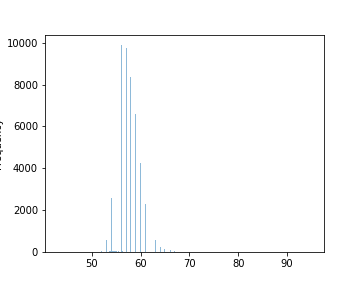


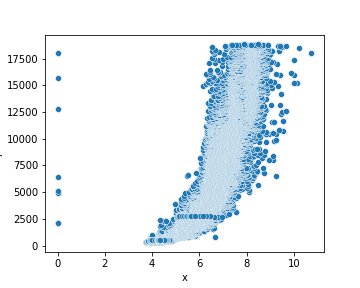
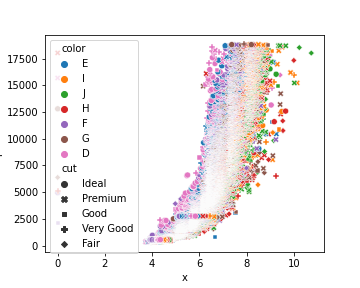
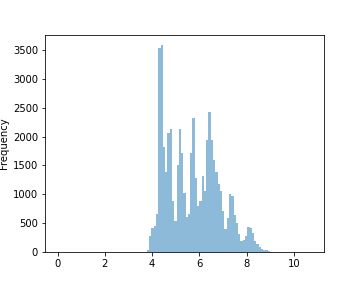


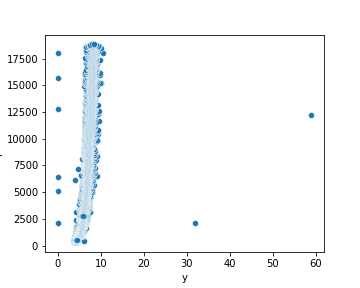
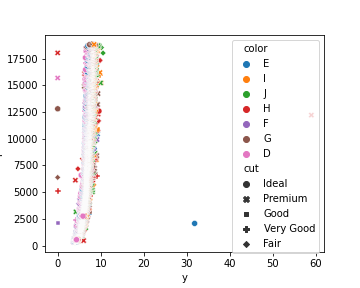
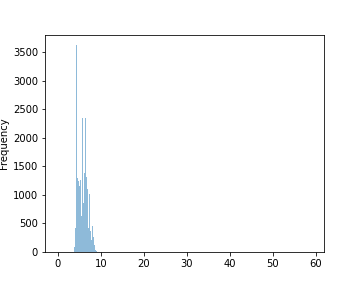


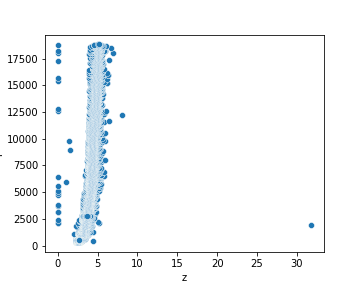
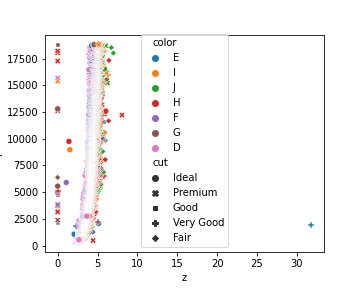
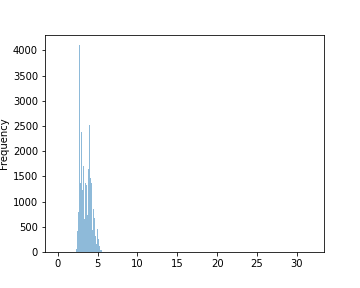


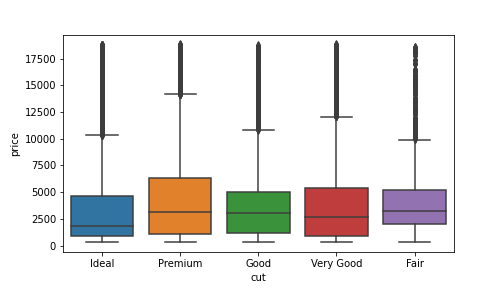
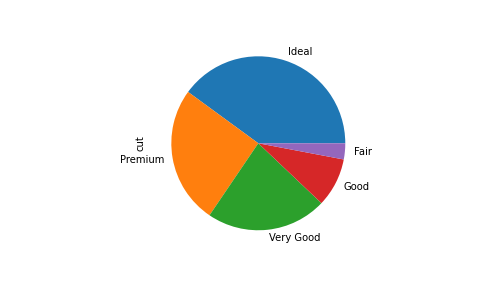


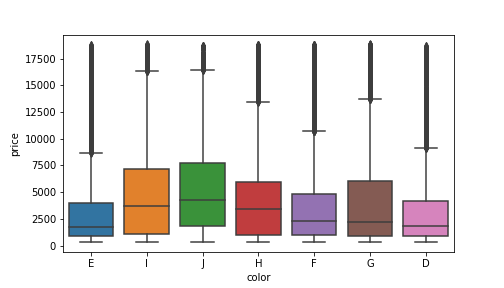
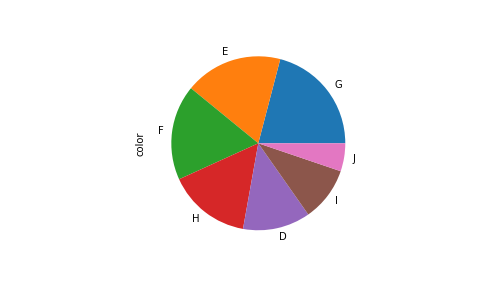


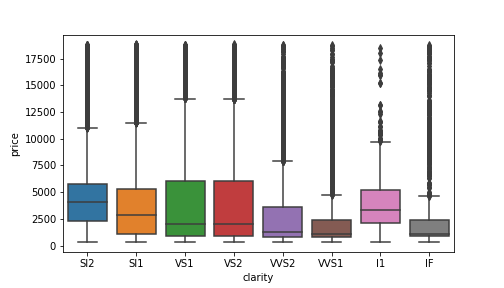
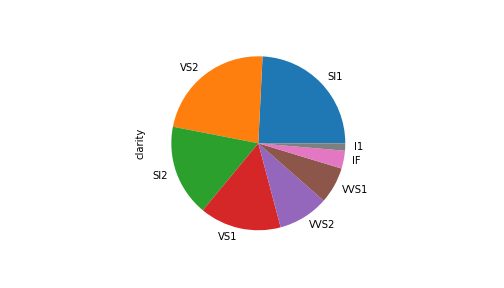

In [187]:
# Diamonds Price
exp.render_target_by_feature_reg(df_diamonds, 'price', n2n_option={'hue':'color', 'style':'cut'})

# 4. Correlation

# 5. Train/Test Distribution

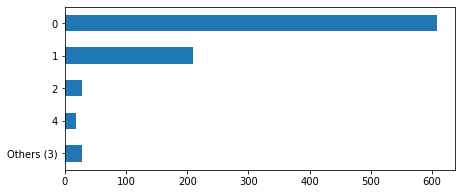

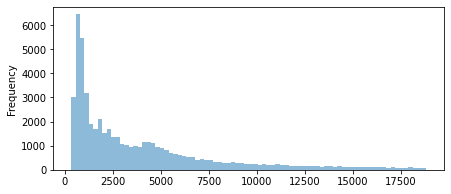

In [232]:
def plot_val_count(df, col, **kwargs):
    if df.empty:
        return None
    
    figsize = kwargs.get('figsize', (7,3))
    show_bars_cnt = kwargs.get('show_bars_cnt', 5)
    num_max_unique = kwargs.get('num_max_unique', 10)
    
    if pd.api.types.is_object_dtype(df[col]) or (pd.api.types.is_numeric_dtype(df[col]) and len(df[col].unique()) < num_max_unique):
        val_cnt = df[col].value_counts(ascending=False)
        len_values = len(val_cnt)

        main_values = val_cnt
        if len_values > show_bars_cnt:
            main_values = val_cnt[:show_bars_cnt-1]
            other_value, other_len = val_cnt[show_bars_cnt-1:].sum(), len(val_cnt[show_bars_cnt-1:])
            main_values[f'Others ({other_len})'] = other_value
        
    #     var_stat['image_fn'] = f'img/hbar_{col}_{figsize[0]}_{figsize[1]}.png'
        ax = main_values[::-1].plot.barh(figsize=figsize)
    #     ax.figure.savefig(var_stat['image_fn'])
    #     plt.close(ax.figure)
        plt.show()

    if pd.api.types.is_numeric_dtype(df[col]) and len(df[col].unique()) >= num_max_unique:
        exp.num2hist(df, col, figsize=figsize)
        plt.show()

plot_val_count(df_diamonds.query('price < 10'), 'color')
plot_val_count(df_titanic, 'SibSp')
plot_val_count(df_diamonds, 'price')